## Graph Framework Visualizer

In [37]:
#import libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.ticker as ticker

In [38]:
#kcoskun https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

In [39]:
def plotLectureGraph(fileName):
    df =  pd.read_csv(fileName)
    #empty graph
    G = nx.DiGraph()
    #Arc radius for bidirectional graphs
    arc_rad = 0
    #iterate through the Dataframe and add nodes/edges/weights
    for index,row in df.iterrows():
        source = row["source"]
        target = row["target"]
        weights = row["weight"]
        G.add_edge(source, target, weight = weights)

    G.add_node(1, pos=(-5,9))
    G.add_node(2, pos=(-5,7))
    G.add_node(3, pos=(-5,11))
    G.add_node(4, pos=(-4,9))
    G.add_node(5, pos=(-4,7))
    G.add_node(6, pos=(-3,11))
    G.add_node(7, pos=(-3,7))
    G.add_node(8, pos=(-3,9))
    G.add_node(9, pos=(-2,10))
    G.add_node(10, pos=(-2,7))
    G.add_node(11, pos=(-1,11))
    G.add_node(12, pos=(-1,9))
    G.add_node(13, pos=(-3.5,5))
    G.add_node(14, pos=(-0.5,7))
    node_positions = nx.get_node_attributes(G,'pos')
    # Draw nodes
    #nx.draw(G, node_positions, with_labels=True, arrows=True, node_size=800, node_color="skyblue")
    nx.draw_networkx_nodes(G, node_positions, node_size = 200)
    nx.draw_networkx_labels(G, node_positions, font_size = 10)

    #The draw_networkx_edges function of NetworkX is able to draw only a subset of the edges with the edgelist parameter.
    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))

    nx.draw_networkx_edges(G, node_positions, edgelist= straight_edges)
    nx.draw_networkx_edges(G, node_positions, edgelist= curved_edges,connectionstyle=f'arc3, rad = {arc_rad}')

    #Labelling
    edge_weights = nx.get_edge_attributes(G,'weight')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    my_draw_networkx_edge_labels(G, node_positions, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad, font_size= 7.5)
    nx.draw_networkx_edge_labels(G, node_positions, edge_labels=straight_edge_labels,rotate=False, font_size =7.5)

    # Show the plot
    plt.axis("off")
    plt.show()

In [40]:
def plotGraph(fileName, arcRad, node_layout):
    #Nodes graph visualization Test
    df = pd.read_csv(fileName)
    #empty graph
    G = nx.DiGraph()
    #Arc radius for bidirectional graphs
    arc_rad = arcRad
    #iterate through the Dataframe and add nodes/edges/weights
    for index,row in df.iterrows():
        source = row["source"]
        target = row["target"]
        weights = row["weight"]
        G.add_edge(source, target, weight = weights)

    # Node Layout (SPRING/CIRCULAR/PLANAR/RANDOM)
    #node_positions = nx.spring_layout(G) 
    #node_positions = nx.circular_layout(G)
    #node_positions = nx.planar_layout(G) 
    #node_positions = nx.random_layout(G)
    #node_positions = nx.kamada_kawai_layout(G)
    #node_positions = nx.spectral_layout(G)
    #node_positions = nx.shell_layout(G)
    #node_positions = nx.spiral_layout(G)

    node_positions = node_layout

    # Draw nodes
    #nx.draw(G, node_positions, with_labels=True, arrows=True, node_size=800, node_color="skyblue")
    nx.draw_networkx_nodes(G, node_positions, node_size = 200)
    nx.draw_networkx_labels(G, node_positions, font_size = 10)

    #The draw_networkx_edges function of NetworkX is able to draw only a subset of the edges with the edgelist parameter.
    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))

    nx.draw_networkx_edges(G, node_positions, edgelist= straight_edges)
    nx.draw_networkx_edges(G, node_positions, edgelist= curved_edges,connectionstyle=f'arc3, rad = {arc_rad}')

    #Labelling
    edge_weights = nx.get_edge_attributes(G,'weight')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    my_draw_networkx_edge_labels(G, node_positions, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad, font_size= 7.5)
    nx.draw_networkx_edge_labels(G, node_positions, edge_labels=straight_edge_labels,rotate=False, font_size =7.5)

    # Show the plot
    plt.axis("off")
    plt.show()

## Prim's Lecture Graph

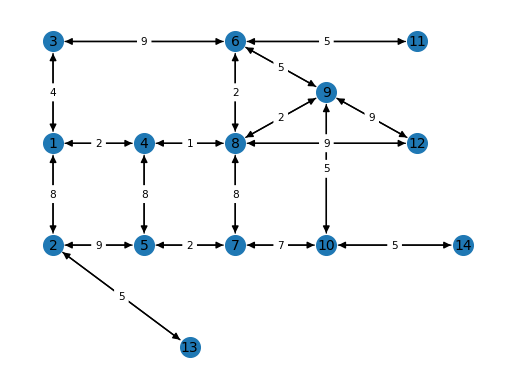

In [41]:
plotLectureGraph("../data/Prim/Graphs/lecture.csv")

## Prim Lecture MST

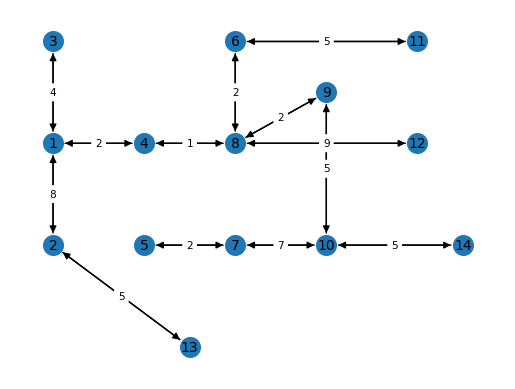

In [42]:
plotLectureGraph("../data/Prim/Graphs/lecture_mst.csv")

## Kruskal Lecture MST (QuickFind)

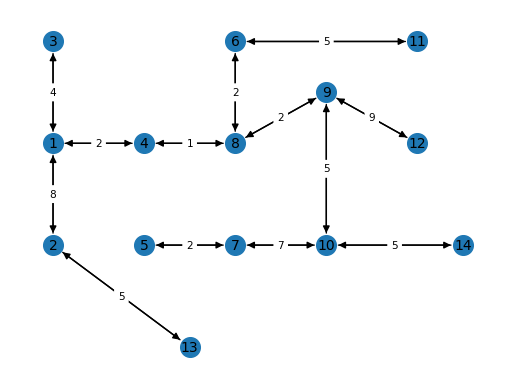

In [43]:
plotLectureGraph("../data/Kruskal/Graphs/lecture_mst.csv")

## Kruskal Lecture MST (QuickUnion)

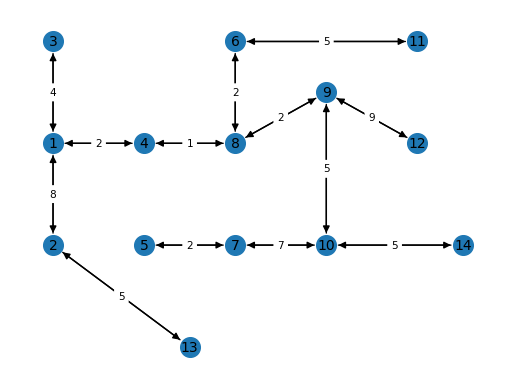

In [46]:
plotLectureGraph("../data/Kruskal/Graphs/lectureQU_mst.csv")

## Kruskal Lecture MST (WQUPC)

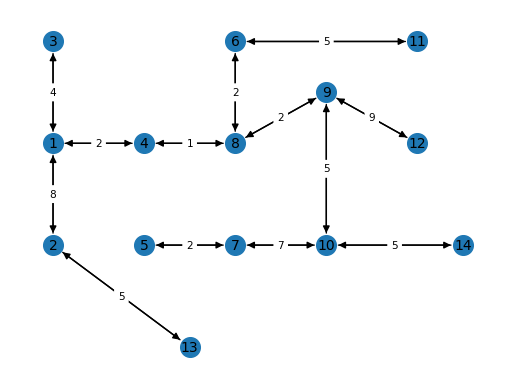

In [47]:
plotLectureGraph("../data/Kruskal/Graphs/lectureWQUPC_mst.csv")